# MALIGNANT COMMENTS CLASSIFICATION

Problem Statement:

The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.
Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.   
There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.    
Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.

Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 

Data Set Description:

The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. 
All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’. 

The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment. 

The data set includes:

-	Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 
-	Highly Malignant: It denotes comments that are highly malignant and hurtful. 
-	Rude: It denotes comments that are very rude and offensive.
-	Threat: It contains indication of the comments that are giving any threat to someone. 	
-	Abuse: It is for comments that are abusive in nature. 
-	Loathe: It describes the comments which are hateful and loathing in nature.  
-	ID: It includes unique Ids associated with each comment text given.   
-	Comment text: This column contains the comments extracted from various social media platforms. 


# Importing required Libraries

In [6]:
#Importing  required Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Loading the train data

In [16]:
# Loading data and converting to DataFrame
df= pd.read_csv(r"C:\Users\Femina\Desktop\Malignant-Comments-Classifier-Project_femi\Malignant Comments Classifier Project\train_Magn_Classifier.csv")
train= pd.DataFrame(data=df)
pd.set_option('display.max_columns',None)
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [17]:
#lets check the shape of the data 
df.shape

(159571, 8)

By looking at the shape of our training data set we came to know that this data set is having 159571 rows and 8 columns. where malignant, highly_malignant,rude,threat, abuse and loathe are our target variabls which are with binary values

In [18]:
#lets check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


The column comment_text contains different comments based on which these comments have been labeled.

In [36]:
#Checking the datatype of the training dataset
train.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

id and comment_text are of object datatype, whereas the other datas are of int64 type.

In [37]:
train.isnull().sum()   #Checking for null values in the train dataset

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

# Lets see how the comments look like

In [19]:
df['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [20]:
df['comment_text'][1]

"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

By observing these comments we can say that we need to do lot of text processing as there are many words wich are not important for prediction, as well as numbers and other stuff.

In [21]:
# Check percentage of comments that are toxic compared to normal comments
df.malignant.value_counts(normalize=True)

0    0.904156
1    0.095844
Name: malignant, dtype: float64

We can see about 90% of the comments falls down into malignant category

In [12]:
#Create a new subset of the data by only taking the 2nd column onwards (comments and categories)
data_count = df.iloc[:,2:].sum()

In [24]:
data_count

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

In [25]:
train['malignant'].value_counts()

0    144277
1     15294
Name: malignant, dtype: int64

In [26]:
train['highly_malignant'].value_counts()

0    157976
1      1595
Name: highly_malignant, dtype: int64

In [28]:
train['rude'].value_counts()

0    151122
1      8449
Name: rude, dtype: int64

In [29]:
train['threat'].value_counts()

0    159093
1       478
Name: threat, dtype: int64

In [30]:
train['abuse'].value_counts()

0    151694
1      7877
Name: abuse, dtype: int64

In [31]:
train['loathe'].value_counts()

0    158166
1      1405
Name: loathe, dtype: int64

From the above observations, we can see that its an imbalanced dataset and we need to handle them

# Loading the Test data

In [32]:
# Loading data and converting to DataFrame
df= pd.read_csv(r"C:\Users\Femina\Desktop\Malignant-Comments-Classifier-Project_femi\Malignant Comments Classifier Project\test_MalignantClassifier.csv")
test= pd.DataFrame(data=df)
pd.set_option('display.max_columns',None)
df

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [34]:
test.shape    #Checking the dimensions of the dataset

(153164, 2)

In [159]:
#Checking the datatype of the training dataset
train.dtypes

comment_text              object
malignant                  int64
highly_malignant           int64
rude                       int64
threat                     int64
abuse                      int64
loathe                     int64
label                      int32
length_before_cleaning     int64
len_after_cleaning         int64
dtype: object

In [158]:
train.isnull().sum()   #Checking for null values in the train dataset

comment_text              0
malignant                 0
highly_malignant          0
rude                      0
threat                    0
abuse                     0
loathe                    0
label                     0
length_before_cleaning    0
len_after_cleaning        0
dtype: int64

In [38]:
#Checking the datatype of the testing dataset
test.dtypes

id              object
comment_text    object
dtype: object

In [39]:
test.isnull().sum()   #Checking for null values in the test dataset

id              0
comment_text    0
dtype: int64

We can see that there are no null values present in both training and testing datasets.

# Exploratory Data Analysis(EDA)

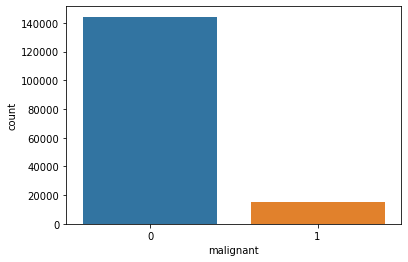

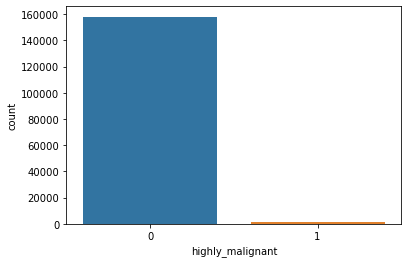

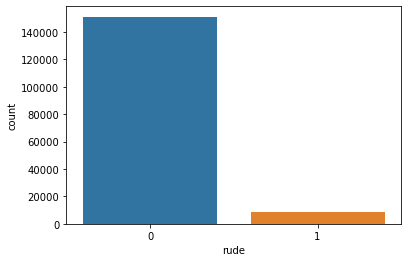

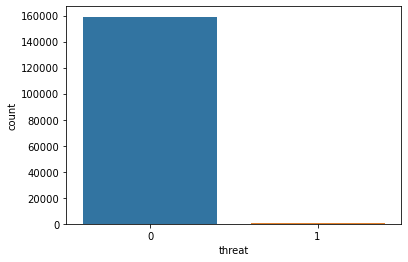

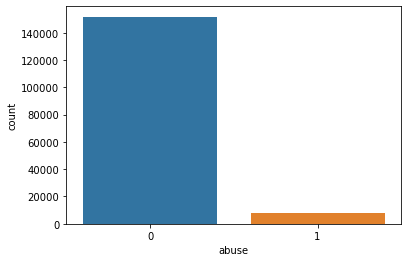

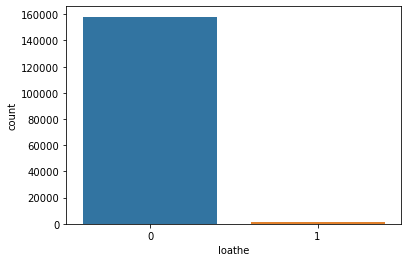

In [40]:
#Plotting countplot for all the features
categories=train.columns[2:]
for col in categories:
    sns.countplot(train[col])
    plt.show()

While maximum Categories belong to Malignant, a lot of comments are abusive and rude as well; while threat comments are the minimum

In [41]:
#Checking the percentage of the comments
none = train[(train['malignant']!=1) & (train['highly_malignant']!=1) & (train['rude']!=1) & 
                            (train['threat']!=1) & (train['abuse']!=1) & (train['loathe']!=1)]
percent=len(none)/len(train)*100
print('Percentage of good/neutral comments = ',percent)
print('Percentage of negative comments = ', (100-percent))

Percentage of good/neutral comments =  89.83211235124176
Percentage of negative comments =  10.167887648758239


We can see that there are more good/neutral comments rather than negative comments

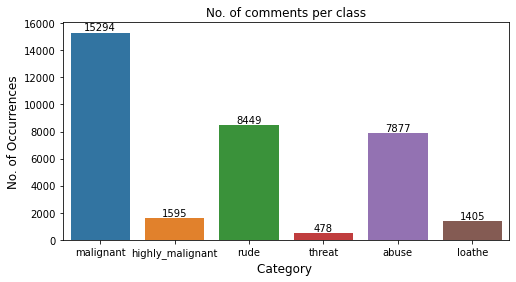

In [44]:
# Plot a chart with the following size
plt.figure(figsize=(8,4))

# Plot a bar chart using the index (category values) and the count of each category.
ax = sns.barplot(data_count.index, data_count.values)

plt.title("No. of comments per class")
plt.ylabel('No. of Occurrences', fontsize=12)
plt.xlabel('Category ', fontsize=12)
rects = ax.patches
labels = data_count.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

Looking at this plot we can say that among all labels the percentage of malignant comments is more

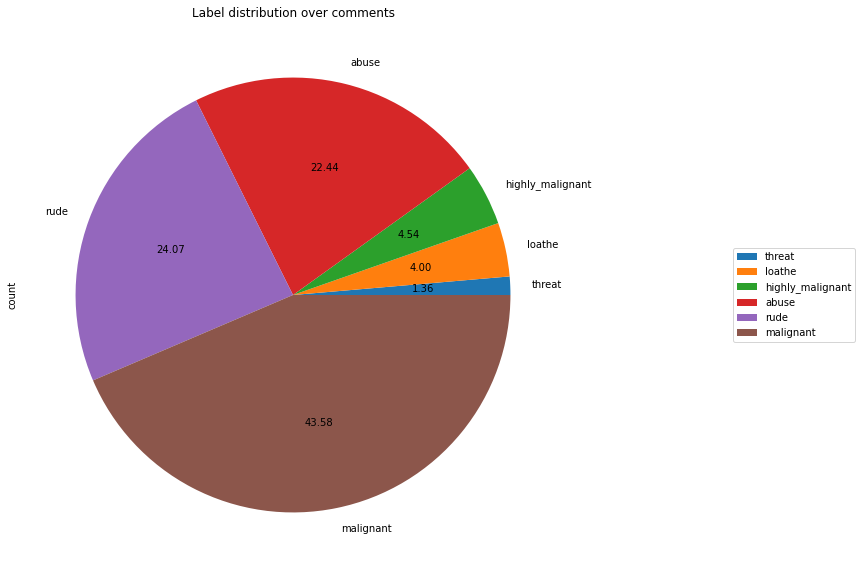

In [46]:
#Visualizing the label distribution of comments using pie chart
comments_labels = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']
df_distribution = train[comments_labels].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y = 'count', title = 'Label distribution over comments', autopct='%.2f', figsize = (10, 10))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

<AxesSubplot:xlabel='comment_text', ylabel='Density'>

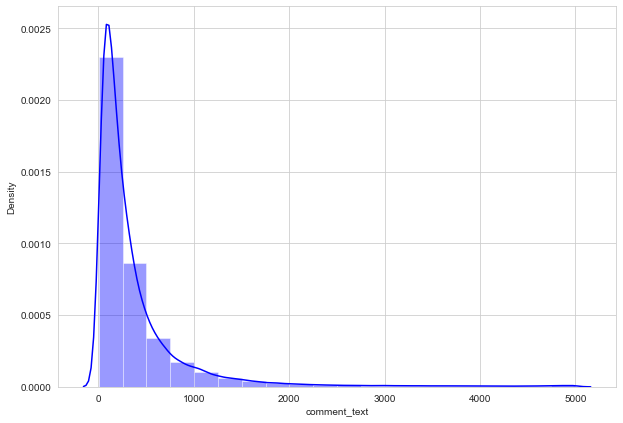

In [47]:
#Distribution of comments length
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
comment_len = train.comment_text.str.len()
sns.distplot(comment_len, bins=20, color = 'blue')

Above is a plot showing the comment length frequency. As noticed, most of the comments are short with only a few comments longer than 1000 words. Majority of the comments are of length 500, where maximum length is 5000 and minimum length is 5. Median length being 250.

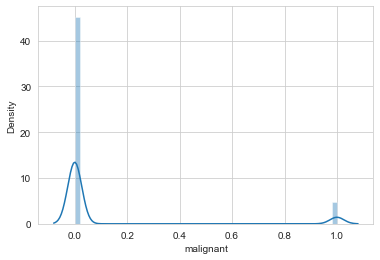

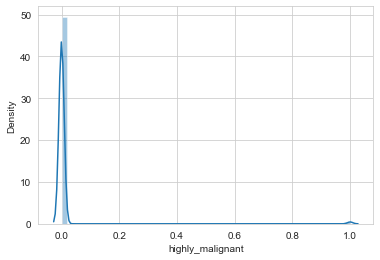

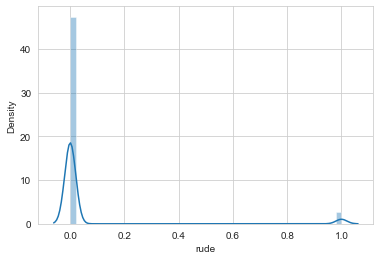

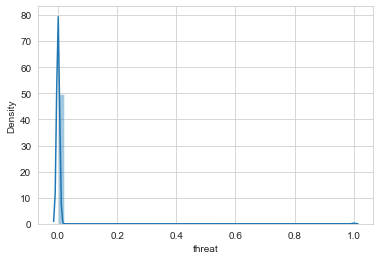

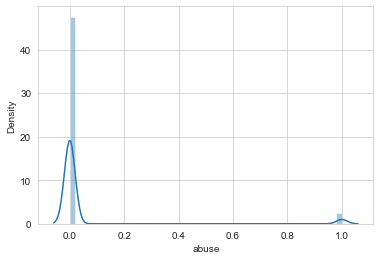

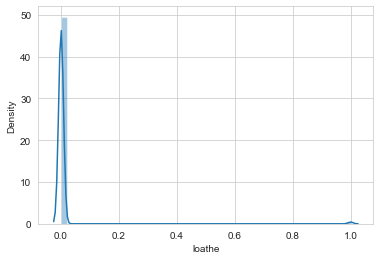

In [48]:
#Plotting distplot for checking the distribution of data
for col in train.describe().columns:
    sns.distplot(train[col])
    plt.show()

We can see that most data are normally distributed

In [49]:
train.describe()    #Statistical summary of the dataset

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The minimum value and the maximum value of the attributes is same i.e., 0 and 1 respectively.

The mean and standard deviation is nearly 0-1 of all the attributes in the training dataset.

Here, with this statistical analysis, it is interpreted that there are no outliers as well as skewness present in this training dataset.

The count of each field is equal which shows that there are no missing values present.

In [50]:
#Checking correlation of the dataset
corr=train.corr()  #corr() function provides the correlation value of each column
corr

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


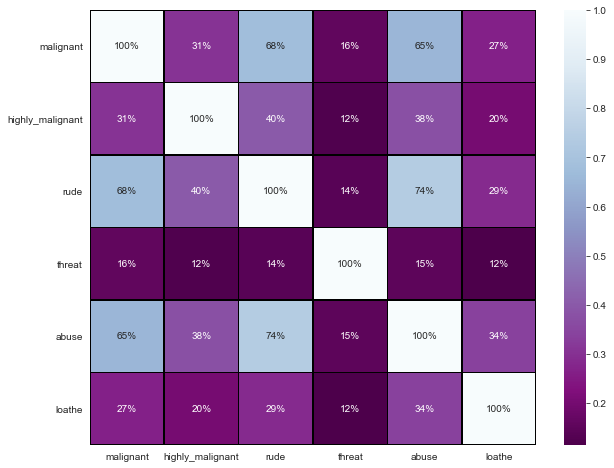

In [54]:
#Plotting heatmap for visualizing the correlation
plt.figure(figsize=(10,8))
sns.heatmap(corr,linewidth=0.5,linecolor='black',fmt='.0%',cmap='BuPu_r',annot=True)
plt.show()

The highest positive correlation is seen in between fields 'rude' and 'abuse'.

Attribute 'threat' is negatively correlated with each and every other feature of this training dataset.

Overall the correlation among the attributes is not positive.

In [55]:
#As ID is not much important, we can drop from the dataset
train.drop('id',axis=1,inplace=True)

# Data pre-processing

In [78]:
#Creating a 'label' column in the train dataset
#Label column is the sum of all the target features
comments_labels = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']
train[comments_labels].sum()

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

In [79]:
train['label']=train[comments_labels].sum(axis=1)
train.head(10)  #Checking the dataset after adding it

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,4
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0,0


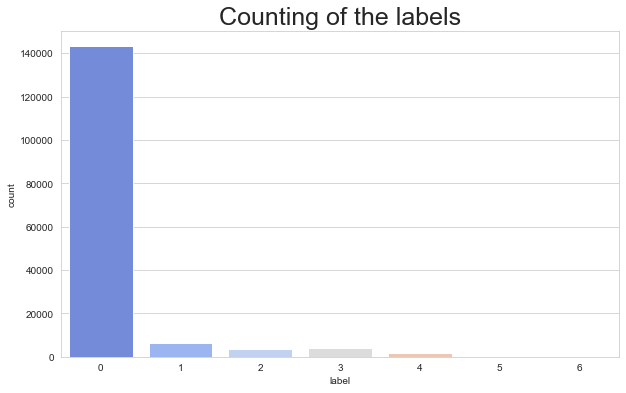

In [81]:
#Checking the count of labels
plt.figure(figsize=(10,6))
sns.countplot(train['label'], palette='coolwarm')
plt.title('Counting of the labels',fontsize=25)
plt.show()

In [82]:
train['label'].value_counts()

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: label, dtype: int64

In [83]:
#Scaling the label column
train['label'] = train['label'] >0
train['label'] = train['label'].astype(int)
train.head(15)    #Checking the data after scaling

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,1
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0,0


0    143346
1     16225
Name: label, dtype: int64


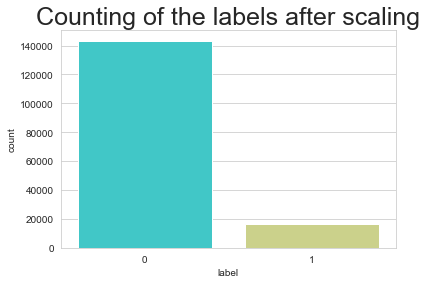

In [84]:
#Checking the counting of labels after scaling
print(train['label'].value_counts())
sns.countplot(train['label'], palette='rainbow')
plt.title('Counting of the labels after scaling',fontsize=25)
plt.show()

After scaling the data, we can see that 0 has more weightage and 1 has lesser weightage

In [85]:
#Creating a column 'length_before_cleaning' in training dataset
#It represents the length of the each comment respectively in a column 'comment_text' 
train['length_before_cleaning'] = train['comment_text'].map(lambda comment_text: len(comment_text))
train

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0,295
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0,99
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0,81
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,0,116


In [86]:
#Creating a column 'length_before_cleaning' in test dataset
#It represents the length of the each comment respectively in a column 'comment_text' 
test['length_before_cleaning'] = test['comment_text'].map(lambda comment_text: len(comment_text))
test

,id,comment_text,length,exclamation,question,length_before_cleaning
0,00001cee341fdb12,bitch ja rule succesful ever whats hating sad ...,0.073215,0.0,0.000000,247
1,0000247867823ef7,rfc title fine amo,0.009802,0.0,0.000000,18
2,00013b17ad220c46,sources zawe ashton lapland —,0.010602,0.0,0.000000,29
3,00017563c3f7919a,look back source information updated correct f...,0.040808,0.0,0.000000,109
4,00017695ad8997eb,anonymously edit articles,0.008002,0.0,0.000000,25
...,...,...,...,...,...,...
153159,fffcd0960ee309b5,totally agree stuff nothing toolongcrap,0.011802,0.0,0.000000,39
153160,fffd7a9a6eb32c16,throw field home plate get faster throwing cut...,0.039408,0.0,0.001736,109
153161,fffda9e8d6fafa9e,okinotorishi ama categories see changes agree ...,0.084417,0.0,0.000868,248
153162,fffe8f1340a79fc2,one founding nations eu germany law return qui...,0.100220,0.0,0.000868,329


# Preprocessing using NLP

In [88]:
#Importing Required libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [89]:
#Defining the stop words
stop_words = stopwords.words('english')

#Defining the lemmatizer
lemmatizer = WordNetLemmatizer()

In [91]:
#Replacing '\n' in comment_text
train['comment_text'] = train['comment_text'].replace('\n',' ')

In [92]:
#Function Definition for using regex operations and other text preprocessing for getting cleaned texts
def clean_comments(text):
    
    #convert to lower case
    lowered_text = text.lower()
    
    #Replacing email addresses with 'emailaddress'
    text = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', lowered_text)
    
    #Replace URLs with 'webaddress'
    text = re.sub(r'http\S+', 'webaddress', text)
    
    #Removing numbers
    text = re.sub(r'[0-9]', " ", text)
    
    #Removing the HTML tags
    text = re.sub(r"<.*?>", " ", text)
    
    #Removing Punctuations
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\_',' ',text)
    
    #Removing all the non-ascii characters 
    clean_words = re.sub(r'[^\x00-\x7f]',r'', text)
    
    #Removing the unwanted white spaces
    text = " ".join(text.split()) 
    
    #Splitting data into words
    tokenized_text = word_tokenize(text)
    
    #Removing remaining tokens that are not alphabetic, Removing stop words and Lemmatizing the text
    removed_stop_text = [lemmatizer.lemmatize(word) for word in tokenized_text if word not in stop_words if word.isalpha()]
   
    return " ".join(removed_stop_text)

In [93]:
#Calling the above function for the column comment_text in training dataset to replace original with cleaned text
train['comment_text'] = train['comment_text'].apply(clean_comments)
train['comment_text']

0         explanation edits made username hardcore metal...
1         aww match background colour seemingly stuck th...
2         hey man really trying edit war guy constantly ...
3         make real suggestion improvement wondered sect...
4                             sir hero chance remember page
                                ...                        
159566    second time asking view completely contradicts...
159567                 ashamed horrible thing put talk page
159568    spitzer umm there actual article prostitution ...
159569    look like actually put speedy first version de...
159570    really think understand came idea bad right aw...
Name: comment_text, Length: 159571, dtype: object

In [94]:
#Creating a column 'len_after_cleaning'
#Representing the length of the each comment respectively in a column 'comment_text' after cleaning the text.
train['len_after_cleaning'] = train['comment_text'].map(lambda comment_text: len(comment_text))
train

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,len_after_cleaning
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,0,264,156
1,aww match background colour seemingly stuck th...,0,0,0,0,0,0,0,112,67
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,0,233,141
3,make real suggestion improvement wondered sect...,0,0,0,0,0,0,0,622,364
4,sir hero chance remember page,0,0,0,0,0,0,0,67,29
...,...,...,...,...,...,...,...,...,...,...
159566,second time asking view completely contradicts...,0,0,0,0,0,0,0,295,178
159567,ashamed horrible thing put talk page,0,0,0,0,0,0,0,99,36
159568,spitzer umm there actual article prostitution ...,0,0,0,0,0,0,0,81,65
159569,look like actually put speedy first version de...,0,0,0,0,0,0,0,116,56


We can see that nearly half of the text has been removed from the comment_text after using required pre-processing

In [95]:
#Checking Total length removal in train dataset
print("Original Length:", train.length_before_cleaning.sum())
print("Cleaned Length:", train.len_after_cleaning.sum())
print("Total Words Removed:", (train.length_before_cleaning.sum()) - (train.len_after_cleaning.sum()))

Original Length: 62893130
Cleaned Length: 38474840
Total Words Removed: 24418290


In [96]:
#Calling the above function for the column comment_text in test dataset so that we can replace original with cleaned text
test['comment_text'] = test['comment_text'].apply(clean_comments)
test['comment_text']

0         bitch ja rule succesful ever whats hating sad ...
1                                        rfc title fine amo
2                                source zawe ashton lapland
3         look back source information updated correct f...
4                                  anonymously edit article
                                ...                        
153159              totally agree stuff nothing toolongcrap
153160    throw field home plate get faster throwing cut...
153161    okinotorishi ama category see change agree cor...
153162    one founding nation eu germany law return quit...
153163    stop already bullshit welcome fool think kind ...
Name: comment_text, Length: 153164, dtype: object

In [97]:
#Creating a column 'len_after_cleaning'
#It represents the length of the each comment respectively in a column 'comment_text' after cleaning the text
test['len_after_cleaning'] = test['comment_text'].map(lambda comment_text: len(comment_text))
test

,id,comment_text,length,exclamation,question,length_before_cleaning,len_after_cleaning
0,00001cee341fdb12,bitch ja rule succesful ever whats hating sad ...,0.073215,0.0,0.000000,247,241
1,0000247867823ef7,rfc title fine amo,0.009802,0.0,0.000000,18,18
2,00013b17ad220c46,source zawe ashton lapland,0.010602,0.0,0.000000,29,26
3,00017563c3f7919a,look back source information updated correct f...,0.040808,0.0,0.000000,109,109
4,00017695ad8997eb,anonymously edit article,0.008002,0.0,0.000000,25,24
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,totally agree stuff nothing toolongcrap,0.011802,0.0,0.000000,39,39
153160,fffd7a9a6eb32c16,throw field home plate get faster throwing cut...,0.039408,0.0,0.001736,109,107
153161,fffda9e8d6fafa9e,okinotorishi ama category see change agree cor...,0.084417,0.0,0.000868,248,244
153162,fffe8f1340a79fc2,one founding nation eu germany law return quit...,0.100220,0.0,0.000868,329,322


In [98]:
#Total length removal in test dataset
print('Original Length:',test.length_before_cleaning.sum())
print('Clean Length:',test.len_after_cleaning.sum())
print("Total Words Removed:", (test.length_before_cleaning.sum()) - (test.len_after_cleaning.sum()))

Original Length: 34970502
Clean Length: 34401826
Total Words Removed: 568676


# Plotting wordcloud for each feature

In [101]:
df_malignant=train[(train['malignant']==1)]
df_malignant

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,len_after_cleaning
6,cocksucker piss around work,1,1,1,0,1,0,1,44,27
12,hey talk exclusive group wp taliban good destr...,1,0,0,0,0,0,1,319,197
16,bye look come think comming back tosser,1,0,0,0,0,0,1,57,39
42,gay antisemmitian archangel white tiger meow g...,1,0,1,0,1,1,1,648,394
43,fuck filthy mother as dry,1,0,1,0,1,0,1,40,25
...,...,...,...,...,...,...,...,...,...,...
159494,previous conversation fucking shit eating libe...,1,0,1,0,1,1,1,1677,1053
159514,mischievious pubic hair,1,0,0,0,1,0,1,33,23
159541,absurd edits absurd edits great white shark to...,1,0,1,0,1,0,1,346,213
159546,hey listen ever delete edits ever annoyed wwe ...,1,0,0,0,1,0,1,534,268


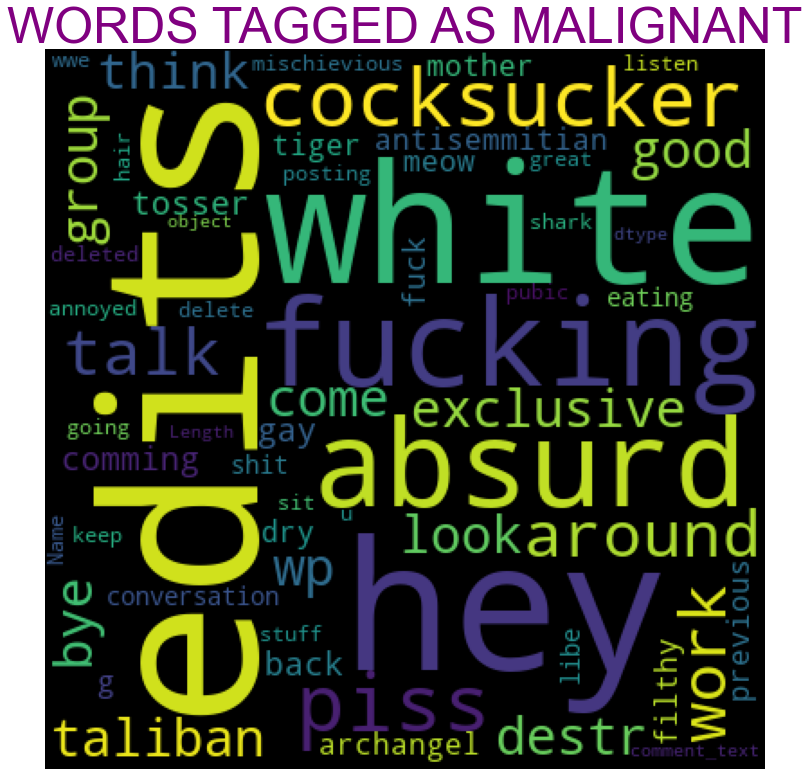

In [103]:
#Plotting for malignant
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_malignant['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS MALIGNANT',fontdict={'fontsize':50, 'fontweight':50, 'color':'purple'})
plt.show()

In [105]:
df_highlymalignant=train[(train['highly_malignant']==1)]
df_highlymalignant

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,len_after_cleaning
6,cocksucker piss around work,1,1,1,0,1,0,1,44,27
55,stupid peace shit stop deleting stuff asshole ...,1,1,1,0,1,0,1,89,70
181,stupid fuck mother cunt stink,1,1,1,0,1,0,1,53,29
442,hi im fucking bitch,1,1,1,0,1,0,1,40,19
579,motherfucking piece crap fuckhead blocking u,1,1,1,0,1,0,1,67,44
...,...,...,...,...,...,...,...,...,...,...
159096,filthy stinking crow back dirty crow better de...,1,1,1,0,1,0,1,251,168
159099,fucking pathetic moron cc jimbo wale rootmyass,1,1,1,0,1,0,1,62,46
159281,lol gay never know good feel fuck woman as,1,1,1,0,1,1,1,87,42
159312,walter mercado antonio quite frankly fucker co...,1,1,1,0,1,0,1,192,137


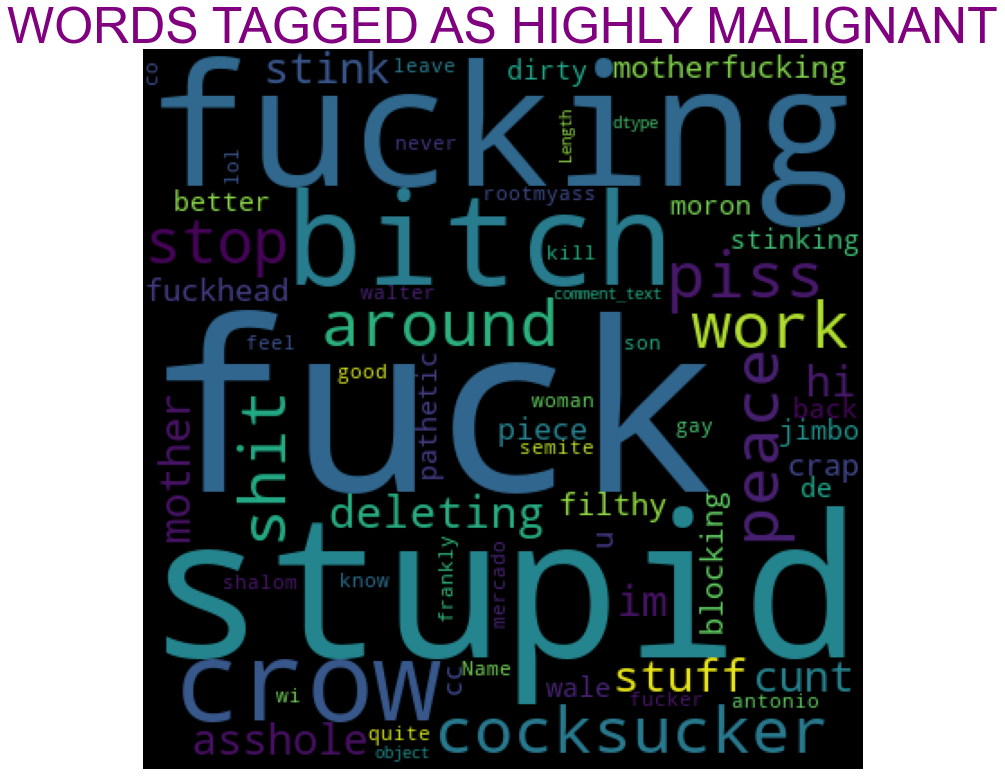

In [107]:
#Plotting for highly_malignant
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_highlymalignant['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS HIGHLY MALIGNANT',fontdict={'fontsize':50, 'fontweight':50, 'color':'purple'})
plt.show()

In [108]:
df_rude=train[(train['rude']==1)]
df_rude

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,len_after_cleaning
6,cocksucker piss around work,1,1,1,0,1,0,1,44,27
42,gay antisemmitian archangel white tiger meow g...,1,0,1,0,1,1,1,648,394
43,fuck filthy mother as dry,1,0,1,0,1,0,1,40,25
51,get fucked get fuckeeed got drink cant put get...,1,0,1,0,0,0,1,124,75
55,stupid peace shit stop deleting stuff asshole ...,1,1,1,0,1,0,1,89,70
...,...,...,...,...,...,...,...,...,...,...
159411,fat piece shit obese piece shit thought naked ...,1,0,1,0,1,0,1,91,65
159493,fucking faggot lolwat,1,0,1,0,1,0,1,24,21
159494,previous conversation fucking shit eating libe...,1,0,1,0,1,1,1,1677,1053
159541,absurd edits absurd edits great white shark to...,1,0,1,0,1,0,1,346,213


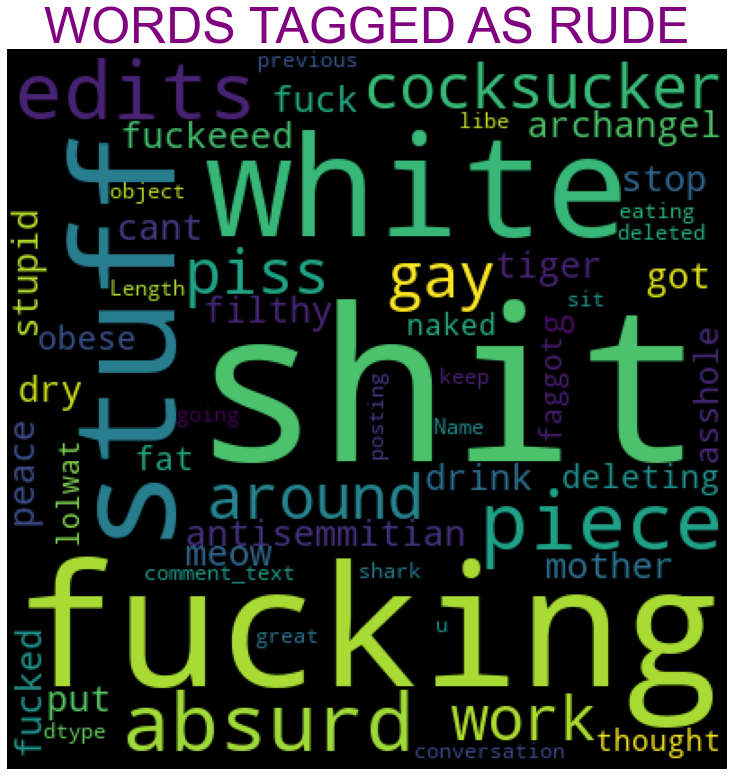

In [109]:
#Plotting for rude
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_rude['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS RUDE',fontdict={'fontsize':50, 'fontweight':50, 'color':'purple'})
plt.show()

In [110]:
df_threat=train[(train['threat']==1)]
df_threat

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,len_after_cleaning
79,hi back last warning stop undoing edits die,1,0,0,1,0,0,1,64,43
176,think fagget get oife burn hell hate sorry can...,1,0,1,1,1,1,1,128,68
600,also sock puppet account suprise sincerely man...,1,0,0,1,0,0,1,138,66
802,fuck smith please notified die want dance grave,1,0,1,1,1,0,1,85,47
1017,first time bitch fuck find live sodomize wife ...,1,1,1,1,1,1,1,150,75
...,...,...,...,...,...,...,...,...,...,...
157718,bitch fucking hore suck dick big as hole gay f...,1,0,1,1,1,1,1,316,195
158717,stupid head dumb stupid die die die go suck butt,1,0,1,1,1,0,1,69,48
158856,hey hey faggot dead yet watching mom getting r...,1,1,1,1,1,0,1,212,124
159029,death musulmans,1,0,0,1,0,1,1,19,15


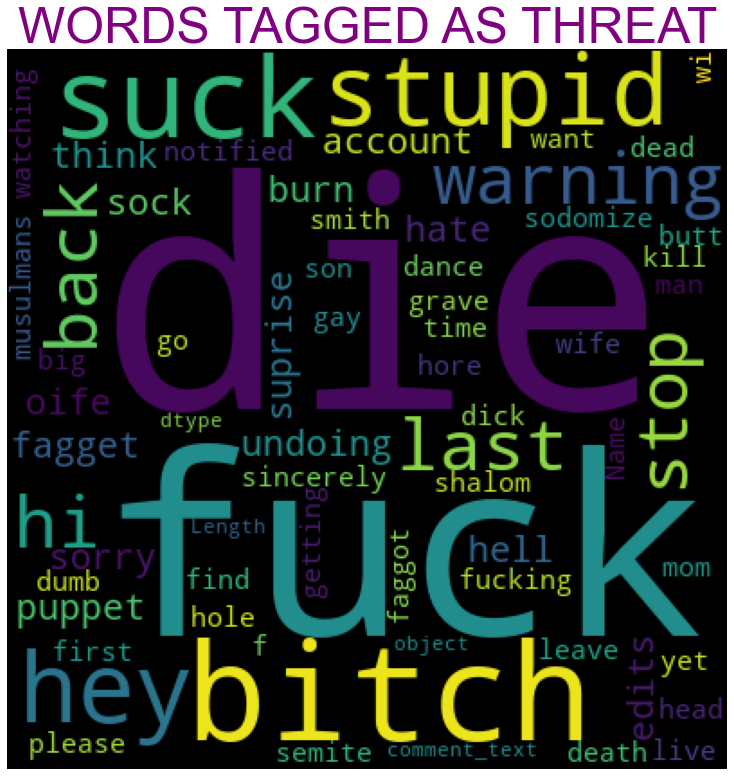

In [111]:
#Plotting for threat
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_threat['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS THREAT',fontdict={'fontsize':50, 'fontweight':50, 'color':'purple'})
plt.show()

In [112]:
df_abuse=train[(train['abuse']==1)]
df_abuse

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,len_after_cleaning
6,cocksucker piss around work,1,1,1,0,1,0,1,44,27
42,gay antisemmitian archangel white tiger meow g...,1,0,1,0,1,1,1,648,394
43,fuck filthy mother as dry,1,0,1,0,1,0,1,40,25
55,stupid peace shit stop deleting stuff asshole ...,1,1,1,0,1,0,1,89,70
56,tony sidaway obviously fistfuckee love arm as,1,0,1,0,1,0,1,68,45
...,...,...,...,...,...,...,...,...,...,...
159494,previous conversation fucking shit eating libe...,1,0,1,0,1,1,1,1677,1053
159514,mischievious pubic hair,1,0,0,0,1,0,1,33,23
159541,absurd edits absurd edits great white shark to...,1,0,1,0,1,0,1,346,213
159546,hey listen ever delete edits ever annoyed wwe ...,1,0,0,0,1,0,1,534,268


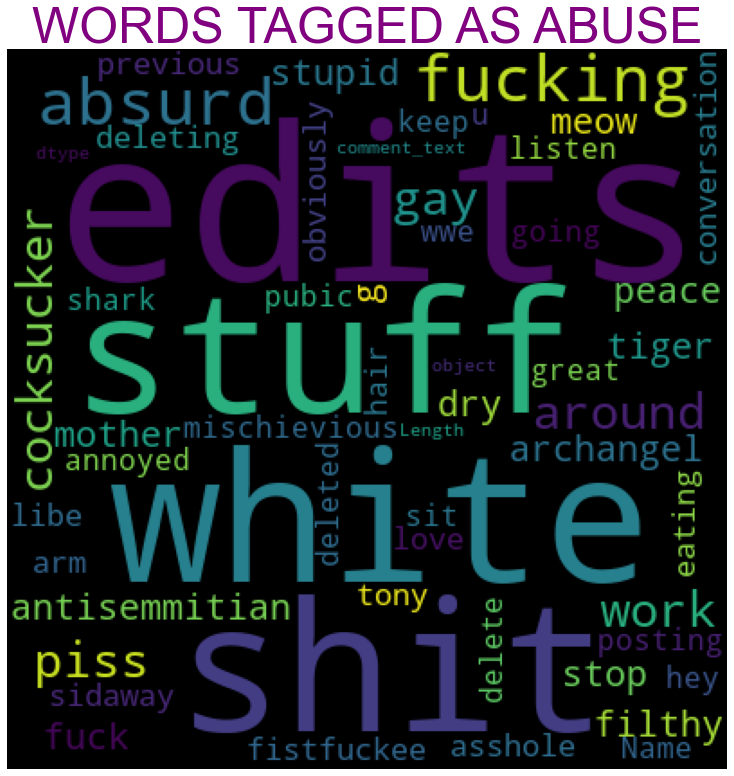

In [113]:
#Plotting for abuse
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_abuse['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS ABUSE',fontdict={'fontsize':50, 'fontweight':50, 'color':'purple'})
plt.show()

In [114]:
df_loathe=train[(train['loathe']==1)]
df_loathe

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,len_after_cleaning
42,gay antisemmitian archangel white tiger meow g...,1,0,1,0,1,1,1,648,394
105,pair jew hating weiner nazi schmuck,1,0,1,0,1,1,1,42,35
176,think fagget get oife burn hell hate sorry can...,1,0,1,1,1,1,1,128,68
218,kill nigger hard others said included racist s...,1,0,1,0,1,1,1,120,58
238,u r tw fuck u gay boy u r smelly fuck ur mum p...,1,0,1,0,1,1,1,58,51
...,...,...,...,...,...,...,...,...,...,...
159281,lol gay never know good feel fuck woman as,1,1,1,0,1,1,1,87,42
159336,oh fuck pansy jew would whine b nai brith beat...,1,0,1,0,1,1,1,110,64
159400,shalom semite get fuck kill son bitch leave wi...,1,1,1,1,1,1,1,474,265
159449,think gay fag,1,0,0,0,0,1,1,26,13


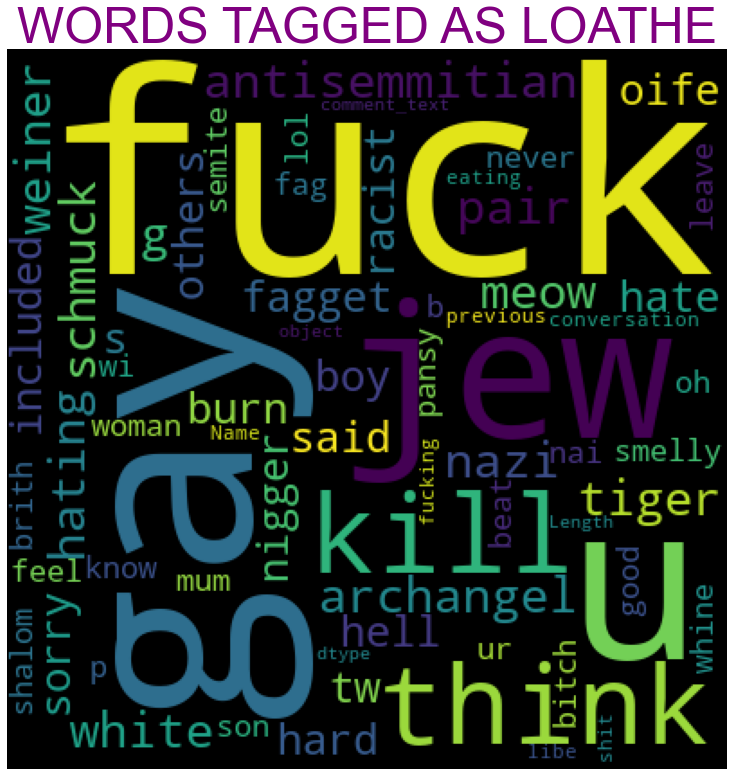

In [116]:
#Plotting for loathe
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_loathe['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS LOATHE',fontdict={'fontsize':50, 'fontweight':50, 'color':'purple'})
plt.show()

From the above wordclouds, we can see that the large texts have more weightage in their respective type of comments whereas small texts have the lesser weightages

# Separating independent and dependent variables

In [117]:
#Converting the features into number vectors
tf_vec = TfidfVectorizer(max_features = 15000, stop_words='english')

In [118]:
#Let's Separate the input and output variables represented by X and y respectively in train data and convert them
X = tf_vec.fit_transform(train['comment_text'])

In [119]:
y=train['label']

In [120]:
print(X.shape,'\t\t', y.shape)    #Checking the shape of the data

(159571, 15000) 		 (159571,)


In [121]:
#Doing the above process for test data 
test_vec = tf_vec.fit_transform(test['comment_text'])
test_vec

<153164x15000 sparse matrix of type '<class 'numpy.float64'>'
	with 2831082 stored elements in Compressed Sparse Row format>

In [122]:
test_vec.shape

(153164, 15000)

# Building the model

In [123]:
#Splitting the training and testing data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [124]:
#Checking the shape of x data
print(x_train.shape,'\t\t',x_test.shape)

(111699, 15000) 		 (47872, 15000)


In [125]:
#Checking the shape of y data
print(y_train.shape,'\t',y_test.shape)

(111699,) 	 (47872,)


# Handling the imbalanced data using oversampling technique

In [127]:
#Importing the Oversampling library and Counter
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [128]:
#We are trying to increase the points of minimum label data
os = RandomOverSampler(0.75)
x_train_os,y_train_os = os.fit_resample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

The number of classes before fit Counter({0: 100342, 1: 11357})
The number of classes after fit Counter({0: 100342, 1: 75256})


In [146]:
#Importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import hamming_loss, log_loss

In [134]:
#Initializing the instance of the model
LR=LogisticRegression()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
xgb=XGBClassifier()

In [135]:
models= []
models.append(('Logistic Regression',LR))
models.append(('MultinomialNB',mnb))
models.append(('DecisionTreeClassifier',dtc))
models.append(('KNeighborsClassifier',knc))
models.append(('RandomForestClassifier',rfc))
models.append(('AdaBoostClassifier',abc))
models.append(('GradientBoostingClassifier',gbc))
models.append(('XGBoostClassifier',xgb))

****************************** Logistic Regression ***************************


LogisticRegression()


accuracy_score:  0.9451036096256684


cross_val_score:  0.956094776134958


roc_auc_score:  0.8967590639750161


Hamming_loss: 0.05489639037433155


Log_loss : 1.896084718188556


Classification report:
 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     43004
           1       0.69      0.84      0.76      4868

    accuracy                           0.95     47872
   macro avg       0.84      0.90      0.86     47872
weighted avg       0.95      0.95      0.95     47872



Confusion matrix: 

[[41174  1830]
 [  798  4070]]


AUC_ROC curve:



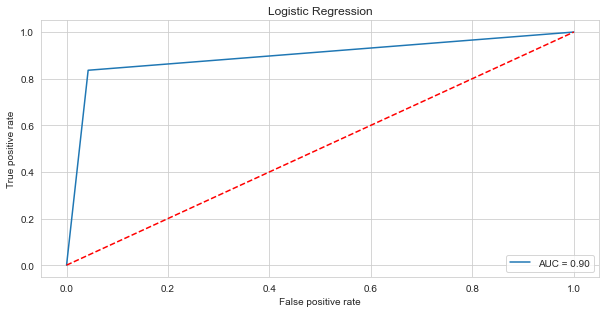





****************************** MultinomialNB ***************************


MultinomialNB()


accuracy_score:  0.909738469251337


cross_val_score:  0.9466005743090046


roc_auc_score:  0.8858189855569033


Hamming_loss: 0.0902615307486631


Log_loss : 3.1175832750983656


Classification report:
 
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     43004
           1       0.54      0.86      0.66      4868

    accuracy                           0.91     47872
   macro avg       0.76      0.89      0.80     47872
weighted avg       0.94      0.91      0.92     47872



Confusion matrix: 

[[39385  3619]
 [  702  4166]]


AUC_ROC curve:



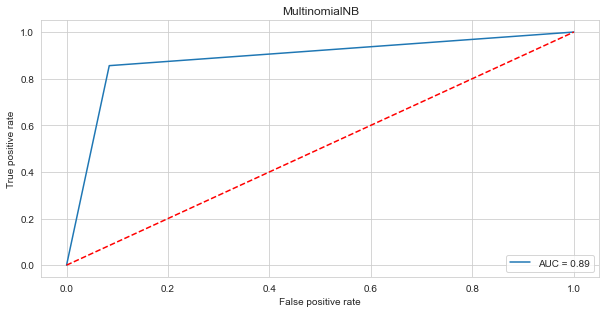





****************************** DecisionTreeClassifier ***************************


DecisionTreeClassifier()


accuracy_score:  0.9290608288770054


cross_val_score:  0.9406972392542778


roc_auc_score:  0.841285349466259


Hamming_loss: 0.07093917112299465


Log_loss : 2.450187027844116


Classification report:
 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     43004
           1       0.63      0.73      0.68      4868

    accuracy                           0.93     47872
   macro avg       0.80      0.84      0.82     47872
weighted avg       0.93      0.93      0.93     47872



Confusion matrix: 

[[40917  2087]
 [ 1309  3559]]


AUC_ROC curve:



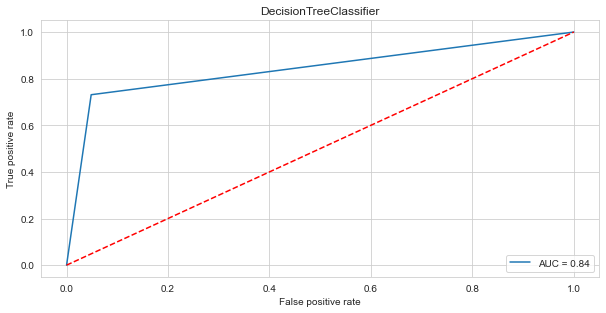





****************************** KNeighborsClassifier ***************************


KNeighborsClassifier()


accuracy_score:  0.7764664104278075


cross_val_score:  0.9178610118092028


roc_auc_score:  0.6639914427329265


Hamming_loss: 0.22353358957219252


Log_loss : 7.720716603217107


Classification report:
 
              precision    recall  f1-score   support

           0       0.94      0.81      0.87     43004
           1       0.23      0.52      0.32      4868

    accuracy                           0.78     47872
   macro avg       0.59      0.66      0.59     47872
weighted avg       0.87      0.78      0.81     47872



Confusion matrix: 

[[34626  8378]
 [ 2323  2545]]


AUC_ROC curve:



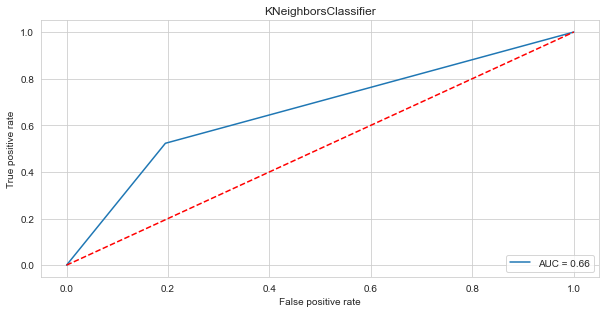





****************************** RandomForestClassifier ***************************


RandomForestClassifier()


accuracy_score:  0.9531876671122995


cross_val_score:  0.9570034615687503


roc_auc_score:  0.829210599889162


Hamming_loss: 0.046812332887700536


Log_loss : 1.616851588371477


Classification report:
 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     43004
           1       0.83      0.67      0.75      4868

    accuracy                           0.95     47872
   macro avg       0.90      0.83      0.86     47872
weighted avg       0.95      0.95      0.95     47872



Confusion matrix: 

[[42352   652]
 [ 1589  3279]]


AUC_ROC curve:



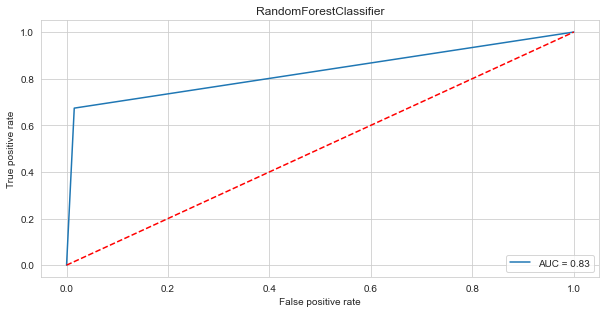





****************************** AdaBoostClassifier ***************************


AdaBoostClassifier()


accuracy_score:  0.9240683489304813


cross_val_score:  0.9459174938176664


roc_auc_score:  0.8118187033794871


Hamming_loss: 0.07593165106951871


Log_loss : 2.6226202744208713


Classification report:
 
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     43004
           1       0.62      0.67      0.64      4868

    accuracy                           0.92     47872
   macro avg       0.79      0.81      0.80     47872
weighted avg       0.93      0.92      0.93     47872



Confusion matrix: 

[[40971  2033]
 [ 1602  3266]]


AUC_ROC curve:



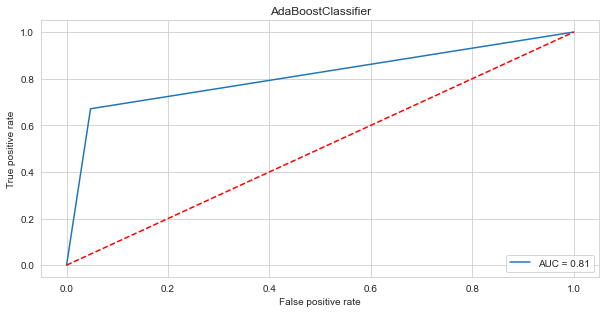





****************************** GradientBoostingClassifier ***************************


GradientBoostingClassifier()


accuracy_score:  0.9443516042780749


cross_val_score:  0.9400705626985089


roc_auc_score:  0.7918662780179742


Hamming_loss: 0.055648395721925134


Log_loss : 1.9220395059031248


Classification report:
 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     43004
           1       0.80      0.60      0.69      4868

    accuracy                           0.94     47872
   macro avg       0.88      0.79      0.83     47872
weighted avg       0.94      0.94      0.94     47872



Confusion matrix: 

[[42285   719]
 [ 1945  2923]]


AUC_ROC curve:



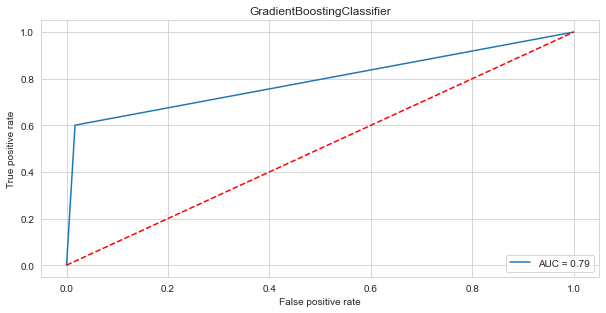





****************************** XGBoostClassifier ***************************


[12:30:10] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


accuracy_score:  0.949093

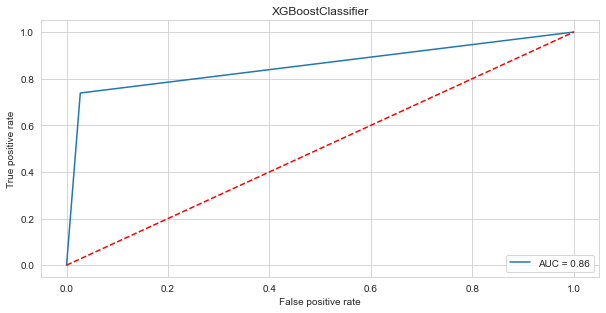

In [136]:
#Making a for loop and calling the algorithm one by one and save data to respective model using append function
Model=[]
score=[]
cvs=[]
rocscore=[]
h_loss=[]
l_loss=[]
for name,model in models:
    print('******************************',name,'***************************')
    print('\n')
    Model.append(name)
    model.fit(x_train_os,y_train_os)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('accuracy_score: ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,X,y,cv=5,scoring='accuracy').mean()
    print('cross_val_score: ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score: ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    hloss = hamming_loss(y_test, pre)
    print("Hamming_loss:", hloss)
    h_loss.append(hloss)
    print('\n')
    try : 
        loss = log_loss(y_test, pre)
    except :
            loss = log_loss(y_test, pre.toarray())   
    print("Log_loss :", loss)
    l_loss.append(loss)
    print('\n')
    print('Classification report:\n ')
    print(classification_report(y_test,pre))
    print('\n')
    print('Confusion matrix: \n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,50))
    plt.subplot(912)
    print('AUC_ROC curve:\n')
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.show()
    
    print('\n\n\n')

# Finalising the result

In [137]:
#Finalizing the result
result=pd.DataFrame({'Model':Model, 'Accuracy_score': score,'Cross_val_score':cvs,'roc_auc_score':rocscore,
                    'Hamming_loss':h_loss, 'Log_loss':l_loss})
result

,Model,Accuracy_score,Cross_val_score,roc_auc_score,Hamming_loss,Log_loss
0,Logistic Regression,94.510361,95.609478,89.675906,0.054896,1.896085
1,MultinomialNB,90.973847,94.660057,88.581899,0.090262,3.117583
2,DecisionTreeClassifier,92.906083,94.069724,84.128535,0.070939,2.450187
3,KNeighborsClassifier,77.646641,91.786101,66.399144,0.223534,7.720717
4,RandomForestClassifier,95.318767,95.700346,82.921060,0.046812,1.616852
5,AdaBoostClassifier,92.406835,94.591749,81.181870,0.075932,2.622620
6,GradientBoostingClassifier,94.435160,94.007056,79.186628,0.055648,1.922040
7,XGBoostClassifier,94.909342,95.392019,85.571453,0.050907,1.758271


After running the for loop of classification algorithms and the required metrics, we can see that the best 2 performing algorithms are RandomForestClassifier and XGBoostClassifier because the loss values are less and their scores are the best among all. Now, we will try Hyperparameter Tuning to find out the best parameters and using them to improve the scores and metrics values

# Hyperparameter Tuning

Random Forest Classifier

In [138]:
#Creating parameter list to pass in GridSearchCV
parameters={'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10],'n_estimators': [50, 100, 500]}

In [ ]:
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier(random_state=42)   #Using the best random state we obtained
rfc=GridSearchCV(rfc,parameters,cv=3,scoring='accuracy')
rfc.fit(x_train_os,y_train_os)
print(rfc.best_params_)     #Printing the best parameters obtained
print(rfc.best_score_)      #Mean cross-validated score of best_estimator

If we run GridSearchCV and RandomSearchCV, it takes more than 2 hours to run the code as the dataset is huge and the best params are not obtained from it due to more computational power requirement. The AUC Score, f1-score and recall value is high when we use randomforest with over sampling data. So we choose RandomForestClassifier model with over sampled data as our best model among all models.

In [147]:
rfc = RandomForestClassifier()
rfc.fit(x_train_os,y_train_os)

RandomForestClassifier()

In [148]:
pred=rfc.predict(x_test)
print('Accuracy score: ',accuracy_score(y_test,pre)*100)
print('Cross validation score: ',cross_val_score(rfc,X,y,cv=5,scoring='accuracy').mean()*100)
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
roc_auc= auc(false_positive_rate,true_positive_rate)
print('roc_auc_score: ',roc_auc)
hloss = hamming_loss(y_test, pre)
print("Hamming_loss:", hloss)
loss = log_loss(y_test, pre)
print("Log loss:", loss)
print('Classification report: \n')
print(classification_report(y_test,pre))
print('Confusion matrix: \n')
print(confusion_matrix(y_test,pre))

Accuracy score:  94.9093415775401
Cross validation score:  95.69658575705147
roc_auc_score:  0.855714526412364
Hamming_loss: 0.05090658422459893
Log loss: 1.7582705716453482
Classification report: 

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     43004
           1       0.76      0.74      0.75      4868

    accuracy                           0.95     47872
   macro avg       0.86      0.86      0.86     47872
weighted avg       0.95      0.95      0.95     47872

Confusion matrix: 

[[41840  1164]
 [ 1273  3595]]


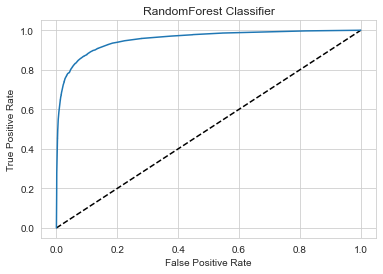

0.8279412505396873


In [149]:
#AUC_ROC Curve of Randomforest Classifier with oversampled data
y_pred_prob=rfc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest Classifier')
plt.show()

auc_score=roc_auc_score(y_test,rfc.predict(x_test))
print(auc_score)

# Finalizing the model

In [150]:
rfc_prediction=rfc.predict(X)
#Making a dataframe of predictions
malignant_prediction=pd.DataFrame({'Predictions':rfc_prediction})
malignant_prediction

,Predictions
0,0
1,0
2,0
3,0
4,0
...,...
159566,0
159567,0
159568,0
159569,0


In [151]:
#Saving the model
import pickle
filename='MalignantCommentsClassifier_Project.pkl'   #Specifying the filename
pickle.dump(rfc,open(filename,'wb'))

# Predicting using test data

In [152]:
#Checking our vectorized test data
test_vec

<153164x15000 sparse matrix of type '<class 'numpy.float64'>'
	with 2831082 stored elements in Compressed Sparse Row format>

In [153]:
#Loading the model
fitted_model=pickle.load(open('MalignantCommentsClassifier_Project.pkl','rb'))
fitted_model

RandomForestClassifier()

In [154]:
#Predictions
test_prediction=rfc.predict(test_vec)
test_df=pd.DataFrame({'Predictions':test_prediction})
test_df

,Predictions
0,0
1,0
2,0
3,0
4,0
...,...
153159,0
153160,0
153161,0
153162,0


# Saving the predictions

In [155]:
#Test predictions
test_results=pd.DataFrame(test_df)
test_results.to_csv('Malignant_TestDataPredictions.csv')

In [156]:
#Train predictions
malignant_prediction.to_csv('Malignant_TrainDataPredictions.csv')

Finally, we had predicted over the test data and the predictions obtained were saved in a csv file.